<a href="https://colab.research.google.com/github/mrdce/Visualization-and-ML/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Переберите параметры с помощью GridSearchCV и обучите Random Forest. Передайте в GridSearchCV модель с указанием random_state

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('/gdrive/My Drive/data/training_mush.csv')

In [ ]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [ ]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]

In [ ]:
clf = RandomForestClassifier(random_state=0)

Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10 \
max_depth: от 1 до 12 с шагом 2\
min_samples_leaf: от 1 до 7\
min_samples_split: от 2 до 9 с шагом 2\

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

In [ ]:
params = {'n_estimators': range(10, 51, 10),
          'max_depth': range(1, 12, 2),
          'min_samples_split': range(2, 9, 2),
          'min_samples_leaf': range(1, 7)}
search = GridSearchCV(clf, params, cv=3, n_jobs=-1)

In [ ]:
search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 51, 10)})

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [ ]:
best_tree = search.best_params_

In [ ]:
best_tree

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

Важность фичей для классификатора?

In [ ]:
clf = RandomForestClassifier(random_state=0, max_depth=9, min_samples_leaf=1, min_samples_split=2, n_estimators=10)

In [ ]:
clf.fit(X, y)

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [ ]:
for i in clf.feature_importances_:
  print(i)

0.00257742212862182
0.0031295679743042135
0.021772980463149925
0.07010932739225456
0.18837641111214493
0.0
0.0808401981015132
0.06846075644129328
0.10386113634342178
0.0075626188138044285
0.10379322056153273
0.03180155160638098
0.048295938206773255
0.017689316743963592
0.006253345808705759
0.0
0.010881201035561587
0.01391009511831237
0.07072611610317477
0.08356418562039068
0.04378342634483357
0.02261118407986276


In [ ]:
counter = 0
tuple_list = []
for i in clf.feature_importances_:
  tuple_list.append((X.columns[counter], i))
  counter += 1

In [ ]:
sorted(tuple_list, key=lambda x: x[1])

[('gill-attachment', 0.0),
 ('veil-type', 0.0),
 ('cap-shape', 0.00257742212862182),
 ('cap-surface', 0.0031295679743042135),
 ('stalk-color-below-ring', 0.006253345808705759),
 ('stalk-shape', 0.0075626188138044285),
 ('veil-color', 0.010881201035561587),
 ('ring-number', 0.01391009511831237),
 ('stalk-color-above-ring', 0.017689316743963592),
 ('cap-color', 0.021772980463149925),
 ('habitat', 0.02261118407986276),
 ('stalk-surface-above-ring', 0.03180155160638098),
 ('population', 0.04378342634483357),
 ('stalk-surface-below-ring', 0.048295938206773255),
 ('gill-size', 0.06846075644129328),
 ('bruises', 0.07010932739225456),
 ('ring-type', 0.07072611610317477),
 ('gill-spacing', 0.0808401981015132),
 ('spore-print-color', 0.08356418562039068),
 ('stalk-root', 0.10379322056153273),
 ('gill-color', 0.10386113634342178),
 ('odor', 0.18837641111214493)]

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

In [ ]:
X_test = pd.read_csv("/gdrive/My Drive/data/testing_mush.csv")

In [ ]:
predicted = clf.predict(X_test)

In [ ]:
predicted.sum()

976

Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам.

In [ ]:
from google.colab import drive
drive.mount('/gdrive' )
y_true = pd.read_csv("/gdrive/My Drive/data/testing_y_mush.csv")

Mounted at /gdrive


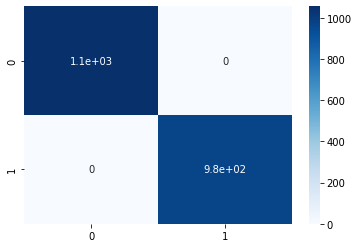

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_true, predicted), annot=True, cmap="Blues")